In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline
import seaborn as sns # for data visualisation

In [2]:
# import csv file
df = pd.read_csv("Loan.csv")

In [3]:
df.shape

(20000, 36)

In [4]:
df.head()

,Application_Date,Age,Annual_Income,Credit_Score,Employment_Status,Education_Level,Experience,Loan_Amount,Loan_Duration,Marital_Status,...,Monthly_Income,Utility_Bills_Payment_History,Job_Tenure,Net_Worth,Base_Interest_Rate,Interest_Rate,Monthly_Loan_Payment,Total_Debt_To_Income_Ratio,Loan_Approved,Risk_Score
0,1/1/2018,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,1/2/2018,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,1/3/2018,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,1/4/2018,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,1/5/2018,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [5]:
pd.isnull(df).sum()

Application_Date                 0
Age                              0
Annual_Income                    0
Credit_Score                     0
Employment_Status                0
Education_Level                  0
Experience                       0
Loan_Amount                      0
Loan_Duration                    0
Marital_Status                   0
Number_Of_Dependents             0
Home_Ownership_Status            0
Monthly_Debt_Payments            0
Credit_Card_Utilization_Rate     0
Number_Of_Open_CreditLines       0
Number_Of_Credit_Inquiries       0
Debt_To_Income_Ratio             0
Bankruptcy_History               0
Loan_Purpose                     0
Previous_Loan_Defaults           0
Payment_History                  0
Length_Of_Credit_History         0
Savings_Account_Balance          0
Checking_Account_Balance         0
Total_Assets                     0
Total_Liabilities                0
Monthly_Income                   0
Utility_Bills_Payment_History    0
Job_Tenure          

In [6]:
df.columns

Index(['Application_Date', 'Age', 'Annual_Income', 'Credit_Score',
       'Employment_Status', 'Education_Level', 'Experience', 'Loan_Amount',
       'Loan_Duration', 'Marital_Status', 'Number_Of_Dependents',
       'Home_Ownership_Status', 'Monthly_Debt_Payments',
       'Credit_Card_Utilization_Rate', 'Number_Of_Open_CreditLines',
       'Number_Of_Credit_Inquiries', 'Debt_To_Income_Ratio',
       'Bankruptcy_History', 'Loan_Purpose', 'Previous_Loan_Defaults',
       'Payment_History', 'Length_Of_Credit_History',
       'Savings_Account_Balance', 'Checking_Account_Balance', 'Total_Assets',
       'Total_Liabilities', 'Monthly_Income', 'Utility_Bills_Payment_History',
       'Job_Tenure', 'Net_Worth', 'Base_Interest_Rate', 'Interest_Rate',
       'Monthly_Loan_Payment', 'Total_Debt_To_Income_Ratio', 'Loan_Approved',
       'Risk_Score'],
      dtype='object')

# Data Visualisation

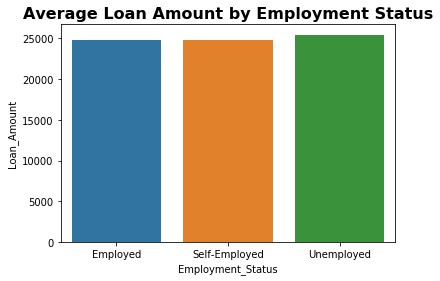

In [7]:
# Bar Chart of Average Loan Amount by Employment Status

avg_loan_by_status = df.groupby('Employment_Status')['Loan_Amount'].mean().reset_index()
sns.barplot(x='Employment_Status', y='Loan_Amount', data=avg_loan_by_status)
plt.title('Average Loan Amount by Employment Status', fontsize= 16, fontweight='bold')
plt.show()

*Purpose: To visualize how loan amounts differ by employment status.*

*Insights: Unemployed individuals tend to have higher average loan amounts compared to self-employed or unemployed applicants.*

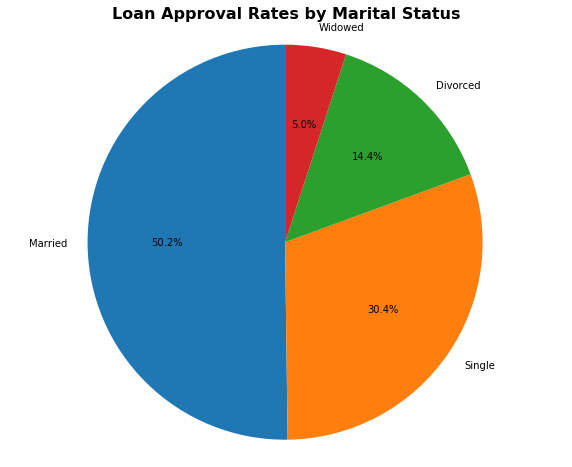

In [8]:
# Pie Chart of Loan Approval Rates by Marital Status

approval_rates = df['Marital_Status'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 8))
plt.pie(approval_rates, labels=approval_rates.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Approval Rates by Marital Status', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

*Purpose: To display the proportion of loan approvals across different marital statuses.*
        
*Insights: Married applicants have higher approval rates compared to single or divorced applicants.*

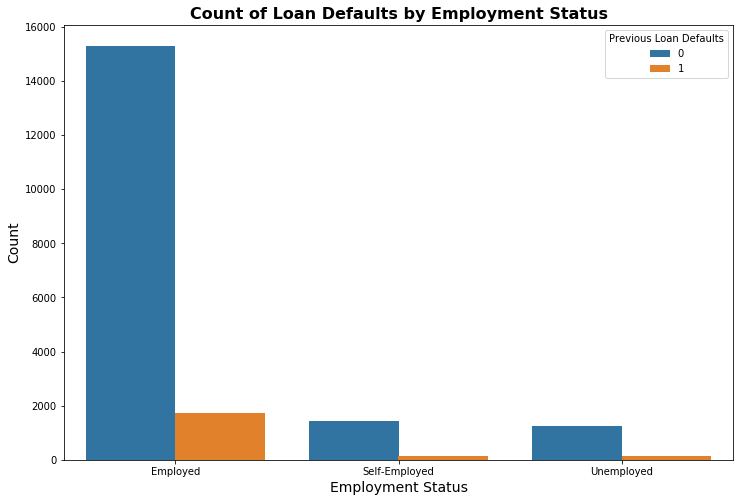

In [9]:
# Count Plot of Loan Defaults by Employment Status

plt.figure(figsize=(12, 8))
sns.countplot(x='Employment_Status', hue='Previous_Loan_Defaults', data=df)
plt.title('Count of Loan Defaults by Employment Status', fontsize=16, fontweight='bold')
plt.xlabel('Employment Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Previous Loan Defaults', loc='upper right')
plt.show()

*Purpose: To compare the number of loan defaults across different employment statuses.*
    
*Insights: Employed applicants show a higher count of previous defaults, highlighting the risk associated with lending to this group.*


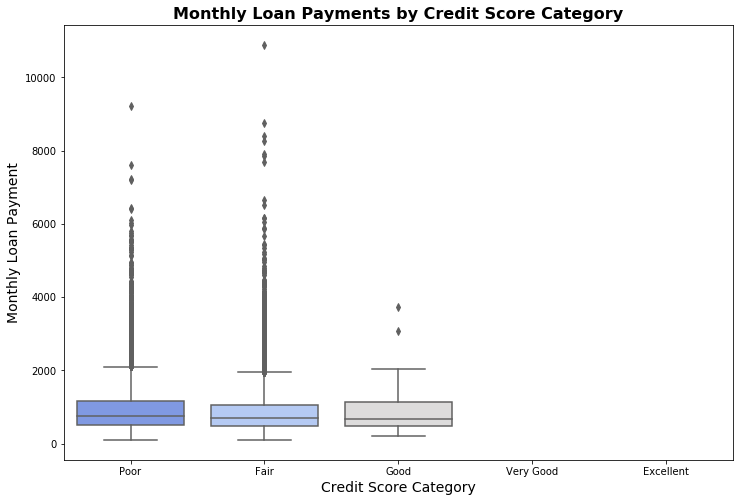

In [10]:
# Monthly Loan Payments by Credit Score Category

df['Credit_Score_Category'] = pd.cut(df['Credit_Score'], bins=[0, 580, 670, 740, 800, 850], labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score_Category', y='Monthly_Loan_Payment', data=df, palette='coolwarm')
plt.title('Monthly Loan Payments by Credit Score Category', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score Category', fontsize=14)
plt.ylabel('Monthly Loan Payment', fontsize=14)
plt.show()

*Purpose: To illustrate the distribution of monthly loan payments across different credit score categories*

*Insights: Higher credit score categories show lower median monthly payments, indicating better repayment terms.*

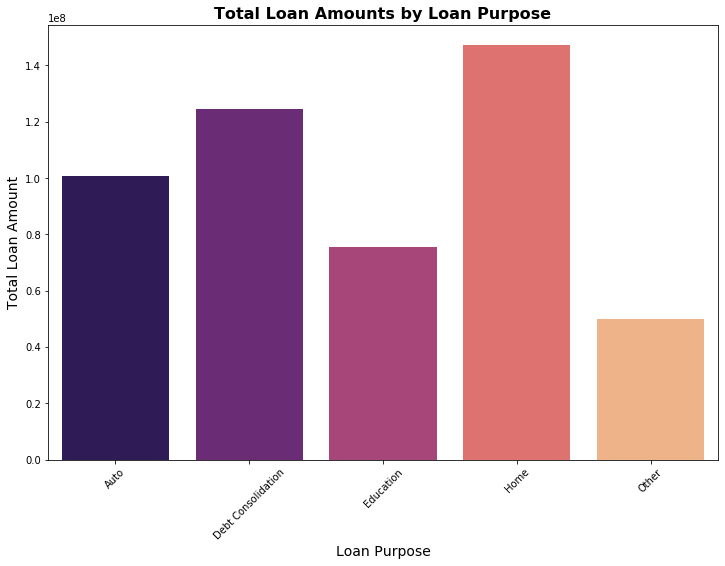

In [11]:
# Total Loan Amounts by Loan Purpose

total_loan_by_purpose = df.groupby('Loan_Purpose')['Loan_Amount'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Loan_Purpose', y='Loan_Amount', data=total_loan_by_purpose, palette='magma')
plt.title('Total Loan Amounts by Loan Purpose', fontsize=16, fontweight='bold')
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Total Loan Amount', fontsize=14)
plt.xticks(rotation=45)
plt.show()

*Purpose: To understand the distribution of loan amounts across different loan purposes.*

*Insights: Certain loan purposes, such as home improvement or debt consolidation, receive significant funding.*

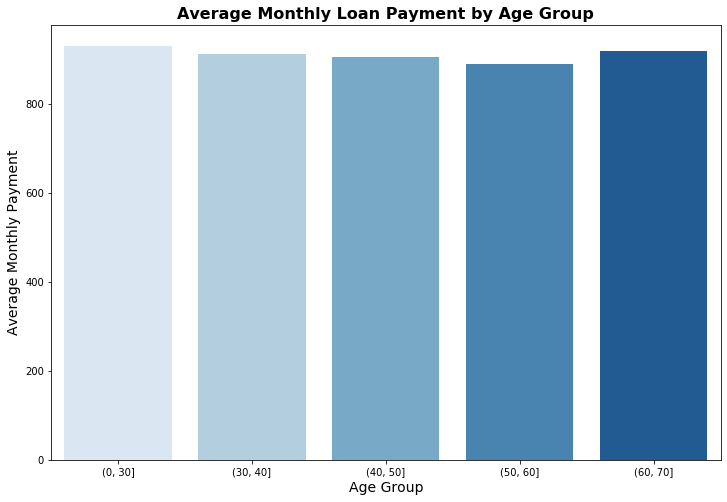

In [15]:
# Average Monthly Loan Payment by Age Group

avg_payment_by_age_group = df.groupby(pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 70]))['Monthly_Loan_Payment'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Age', y='Monthly_Loan_Payment', data=avg_payment_by_age_group, palette='Blues')
plt.title('Average Monthly Loan Payment by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Monthly Payment', fontsize=14)
plt.show()

*Purpose: To analyze how monthly loan payments vary by age group.*
    
*Insights: Younger applicants tend to have higher monthly payments, potentially reflecting higher loan amounts.*

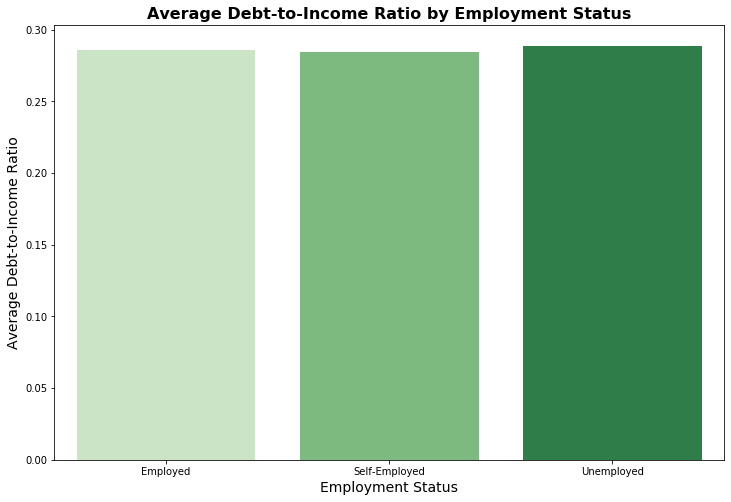

In [16]:
# Average Debt-to-Income Ratio by Employment Status

avg_dti_by_status = df.groupby('Employment_Status')['Debt_To_Income_Ratio'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Employment_Status', y='Debt_To_Income_Ratio', data=avg_dti_by_status, palette='Greens')
plt.title('Average Debt-to-Income Ratio by Employment Status', fontsize=16, fontweight='bold')
plt.xlabel('Employment Status', fontsize=14)
plt.ylabel('Average Debt-to-Income Ratio', fontsize=14)
plt.show()

*Purpose: To evaluate the average debt-to-income ratio across different employment statuses.*

*Insights: Unemployed individuals may exhibit higher debt-to-income ratios compared to employed individuals.*

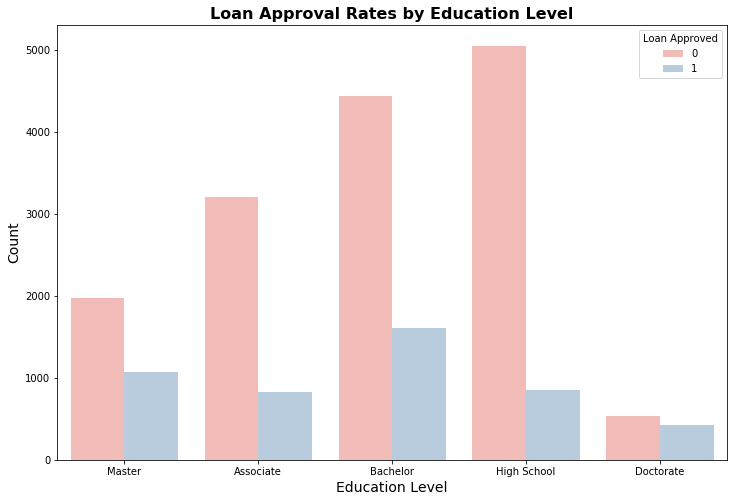

In [17]:
# Loan Approval Rates by Education Level

plt.figure(figsize=(12, 8))
sns.countplot(x='Education_Level', hue='Loan_Approved', data=df, palette='Pastel1')
plt.title('Loan Approval Rates by Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Loan Approved', loc='upper right')
plt.show()

*Purpose: To compare loan approval rates across different education levels.*
    
*Insights: Higher education levels are associated with higher loan approval rates.*

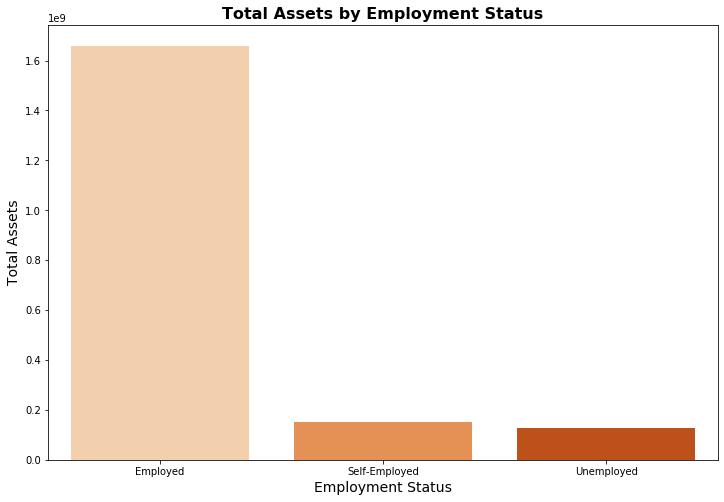

In [18]:
# Total Assets by Employment Status

total_assets_by_status = df.groupby('Employment_Status')['Total_Assets'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Employment_Status', y='Total_Assets', data=total_assets_by_status, palette='Oranges')
plt.title('Total Assets by Employment Status', fontsize=16, fontweight='bold')
plt.xlabel('Employment Status', fontsize=14)
plt.ylabel('Total Assets', fontsize=14)
plt.show()

*Purpose: To understand the total assets held by applicants across different employment statuses.*
    
*Insights: Employed individuals tend to have significantly higher total assets compared to other groups.*

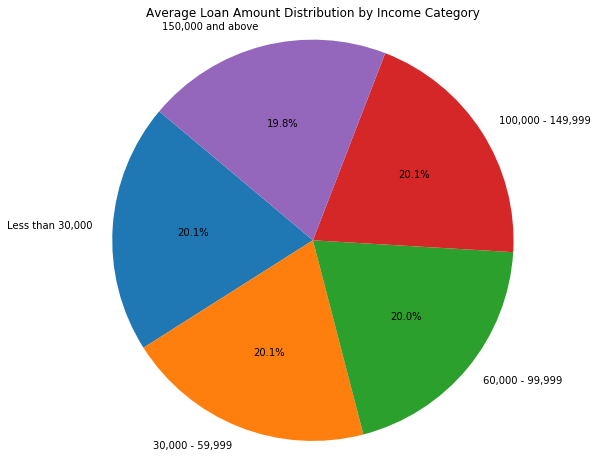

In [22]:
# Categorizing Annual Income into ranges
df['Income_Category'] = pd.cut(df['Annual_Income'],
    bins=[0, 30000, 60000, 100000, 150000, float('inf')],
    labels=['Less than 30,000', '30,000 - 59,999', '60,000 - 99,999', 
            '100,000 - 149,999', '150,000 and above'],
    right=False
)

# Calculating average loan amount by income category
avg_loan_by_income = df.groupby('Income_Category')['Loan_Amount'].mean().reset_index()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(avg_loan_by_income['Loan_Amount'], labels=avg_loan_by_income['Income_Category'], autopct='%1.1f%%', startangle=140)
plt.title('Average Loan Amount Distribution by Income Category')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.show()

*Purpose: The purpose of this pie chart is to visually represent the distribution of the average loan amount across different income categories.*

*Insight: The pie chart reveals that the highest income categories and the lowest income categories tend to account for a larger proportion of total average loan amounts.*